# I. Rigid and perspective transformations in homogeneous coordinates

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [7]:
def box3d(n):
    """Generate a set of points: 3D cross in cube."""
    coordinates = np.zeros([3, 15 * n])
    half_length = 0.5
    border = half_length * np.ones(n)
    variation = np.linspace(-half_length, half_length, n)
    elems = np.array([-border, border, variation])
    indices = np.array(
        [
            [0, 0, 2],
            [0, 1, 2],
            [1, 0, 2],
            [1, 1, 2],
            [0, 2, 0],
            [0, 2, 1],
            [1, 2, 0],
            [1, 2, 1],
            [2, 0, 0],
            [2, 0, 1],
            [2, 1, 0],
            [2, 1, 1],
        ]
    )
    for i in range(12):
        coordinates[:, i * n : (i + 1) * n,] = elems[indices[i]]
    for i in range(12, 15):
        coordinates[i % 3, i * n : (i + 1) * n] = variation
    return coordinates


def projectpoints(K, R, t, Q):
    """Return the projected points as a 2xn matrix."""
    _, n = Q.shape
    Q = np.vstack([Q, np.ones(n)])
    T = np.vstack([np.hstack([R, t])])
    P = K @ T @ Q
    P = P[0:2, :] / P[2, :]
    return P

### OpenCV test

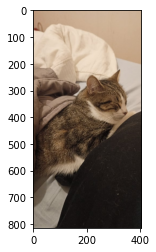

In [10]:
im = cv2.imread("cat.jpg")
b, g, r = cv2.split(im)
im = cv2.merge([r, g, b])

plt.imshow(im);

### 11. Box

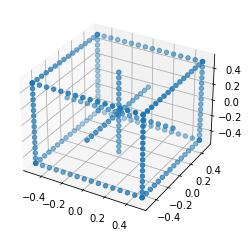

In [13]:
Q = box3d(16)

fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.scatter(Q[0], Q[1], Q[2]);

### 12. Projection

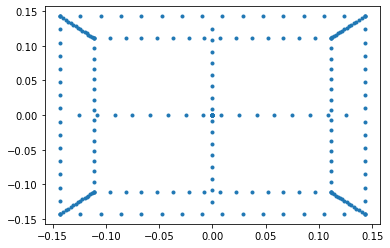

In [17]:
R = np.eye(3)
K = np.eye(3)
t = np.zeros([3, 1])
t[2] = 4


p2d = projectpoints(K, R, t, Q)

plt.figure()
plt.plot(p2d[0], p2d[1], ".");

### 13. Rotation

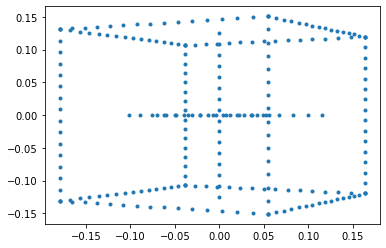

In [18]:
theta = np.pi / 6
R = np.array(
    [[np.cos(theta), 0, np.sin(theta)], [0, 1, 0], [-np.sin(theta), 0, np.cos(theta)]]
)


p2d = projectpoints(K, R, t, Q)

plt.figure()
plt.plot(p2d[0], p2d[1], ".");

### 14. Relationship between the position of the camera and t

t is the translation of the point, so -t is the translation of the camera. t is the origin for the camera.